In [6]:
import pymc as mc
import numpy as np
import datetime
from scipy import constants
c_light_kms = constants.c / 1000.

# grab it from http://nhmc.github.io/Barak/
#import barak
#from barak import absorb
#from barak import convolve
#from barak import voigt
#from barak import pyvpfit

%matplotlib inline
#import matplotlib
import matplotlib.pylab as pylab
from matplotlib.backends.backend_pdf import PdfPages
pylab.rcParams['figure.figsize'] = 13, 7



import pandas as pd

In [4]:
def VoigtAbsorption(tau_array):
    return np.exp(-tau_array)

def GaussFunction(wavelength_array, amplitude, centroid, sigma, *args, **kwargs):
    return amplitude * np.exp(-0.5 * ((wavelength_array - centroid) / sigma)**2)


Instrument detection region. Wavelength units are in Angstroms ($\unicode{x212B}$).

In [21]:
wavelength_array = np.arange(5010, 5030, 0.02) 

Create some physical clouds. Each cloud is fully specified by 3 numbers: amplitude, centroid, and sigma-width

In [32]:
clouds = pd.DataFrame(columns={'cloud', 'amplitude', 'centroid', 'sigma'})

clouds = clouds.append({'cloud': '0', 'amplitude': 0.85, 'centroid': 5017.5, 'sigma': 1.2}, ignore_index=True)
clouds = clouds.append({'cloud': '1', 'amplitude': 0.35, 'centroid': 5018.1, 'sigma': 0.7}, ignore_index=True)

clouds

,centroid,sigma,cloud,amplitude
0,5017.5,1.2,0,0.85
1,5018.1,0.7,1,0.35


In [37]:
clouds['tau'][0] = GaussFunction(wavelength_array, clouds.ix[0]['amplitude'], clouds.ix[0]['centroid'], clouds.ix[0]['sigma'])

#+ GaussFunction(wavelength_array, clouds.ix[1]['amplitude'], clouds.ix[1]['centroid'], clouds.ix[1]['sigma'])

KeyError: 'tau'

In [34]:
clouds

,centroid,sigma,cloud,amplitude
0,5017.5,1.2,0,0.85
1,5018.1,0.7,1,0.35


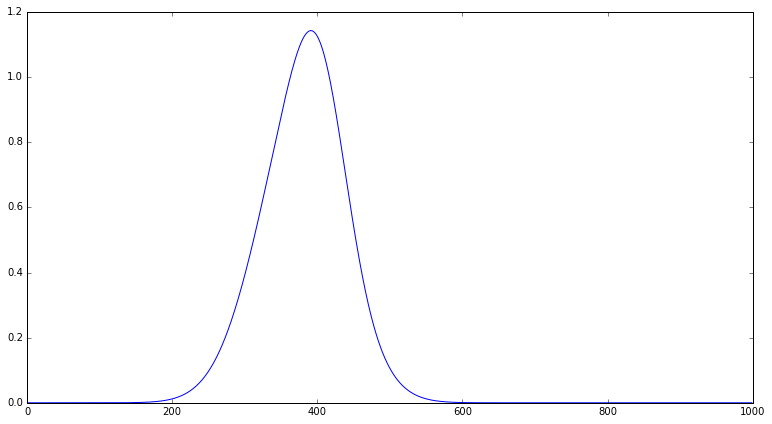

In [31]:
pylab.plot(wavelength_array, tau_array_one, color='blue', label='comp_1')
pylab.plot(wavelength_array, tau_array_two, color='red', label='comp_2')
pylab.plot(wavelength_array, total_tau, color='black', label='combined', linewidth=2.0)
pylab.ylabel("Optical Depth")
pylab.xlabel("Wavelength (Angstroms)")
pylab.legend()
pylab.title("Toy example")